In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
def data_reading_cleaning():
    '''
    data reading and cleaning
    make sure degrees-that-pay-back.csv, salaries-by-college.csv
    are in the same folder of this script
    if you dont have those data, please download it at: https://www.kaggle.com/wsj/college-salaries
    '''
    def string_dollar_to_integer(data, column):
        '''
        change string dollar to integer dollar
        example : $75,000.00 to 75000
        data: pandas.core.frame.DataFrame
        column: valid column name in data
        '''
        assert isinstance(column, str)
        assert data.columns.contains(column)
        data[column] = data[column].apply(lambda x: int(x.replace(",","").strip('$').split('.')[0]) if isinstance(x, str) else x)
    df = pd.read_csv("./salaries-by-college.csv")
    string_dollar_to_integer(df, 'Mid-Career Median Salary')
    string_dollar_to_integer(df, 'Cost of Tuition')
    string_dollar_to_integer(df, 'Starting Median Salary')
    string_dollar_to_integer(df, 'Mid-Career 10th Percentile Salary')
    string_dollar_to_integer(df, 'Mid-Career 25th Percentile Salary')
    string_dollar_to_integer(df, 'Mid-Career 75th Percentile Salary')
    string_dollar_to_integer(df, 'Mid-Career 90th Percentile Salary')
    return df
College_df= data_reading_cleaning()

In [3]:
def get_top_k_school(College_df, basedOn = "salary_start", k = 20, reverse = False):
    '''
    get the top best school based on 'based On'. 
    :basedOn string, supported option:salary_start, salary_mid, ROI, tuition
    :k positive integer
    :reverse bool
    '''
    assert isinstance(basedOn, str)
    assert basedOn in ['salary_start', 'salary_mid', 'ROI', 'tuition']
    assert isinstance(k, int)
    assert k >= 1
    assert isinstance(reverse, bool)
    f, ax = plt.subplots(figsize=(15, 20))
    College_df["ROI"] = 0
    for i in range(len(College_df)):
        mid_salary = int(College_df.at[i, "Mid-Career Median Salary"])
        tuition = int(College_df.at[i, "Cost of Tuition"])
        College_df.at[i, "ROI"] = (mid_salary * 30 - tuition * 4) / (tuition * 4)
    if basedOn == 'salary_start':
        College_df = College_df.sort_values("Starting Median Salary", ascending=reverse).reset_index()
        ax.set_yticklabels(College_df['School Name'][:k], rotation='horizontal', fontsize='large')
        g = sns.barplot(y = College_df['School Name'][:k], x= College_df["Starting Median Salary"][:k])
    elif basedOn == 'salary_mid' :
        College_df = College_df.sort_values("Mid-Career Median Salary", ascending=reverse).reset_index()
        ax.set_yticklabels(College_df['School Name'][:k], rotation='horizontal', fontsize='large')
        g = sns.barplot(y = College_df['School Name'][:k], x= College_df["Mid-Career Median Salary"][:k])
    elif basedOn == 'ROI':
        College_df = College_df.sort_values("ROI", ascending=reverse).reset_index()
        ax.set_yticklabels(College_df['School Name'][:k], rotation='horizontal', fontsize='large')
        g = sns.barplot(y = College_df['School Name'][:k], x= College_df["ROI"][:k])
    elif basedOn == 'tuition':
        College_df = College_df.sort_values("Cost of Tuition", ascending=reverse).reset_index()
        ax.set_yticklabels(College_df['School Name'][:k], rotation='horizontal', fontsize='large')
        g = sns.barplot(y = College_df['School Name'][:k], x= College_df["Cost of Tuition"][:k])
    plt.show()
    return College_df[: k]

# Report

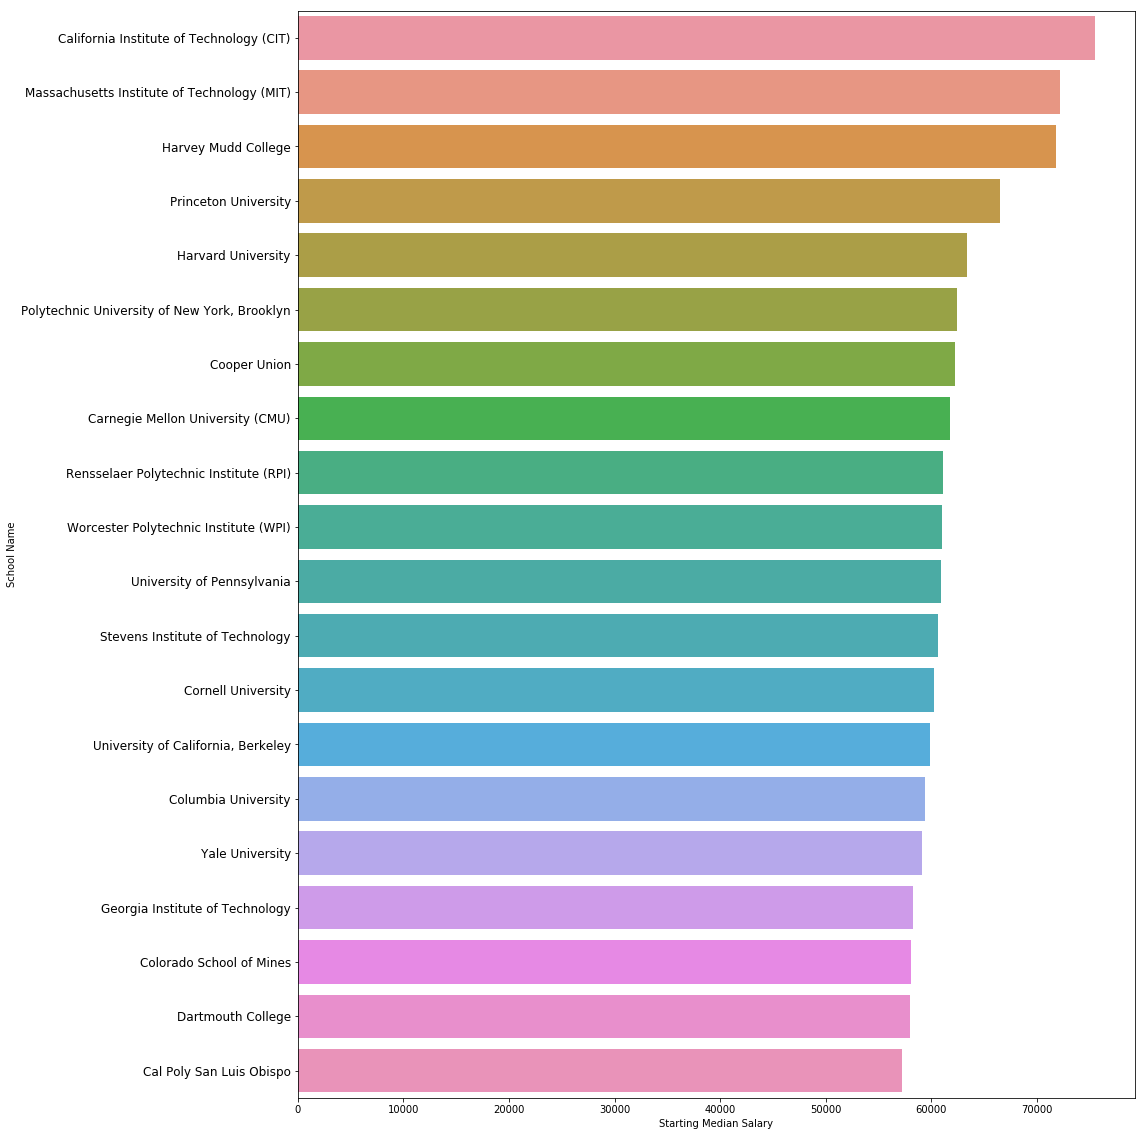

In [4]:
head = get_top_k_school(College_df, basedOn = "salary_start")

In [5]:
head

,index,School Name,State,Cost of Tuition,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,ROI
0,17,California Institute of Technology (CIT),CA,45390,Private,75500,123000,NaN,104000,161000,NaN,19
1,79,Massachusetts Institute of Technology (MIT),MA,51888,Private,72200,126000,76800.0,99200,168000,220000.0,17
2,63,Harvey Mudd College,CA,50649,Private,71800,122000,NaN,96000,180000,NaN,17
3,109,Princeton University,NJ,54912,Private,66500,131000,68900.0,100000,190000,261000.0,16
4,62,Harvard University,MA,52437,Private,63400,124000,54800.0,86200,179000,288000.0,16
5,106,"Polytechnic University of New York, Brooklyn",NY,46376,Private,62400,114000,66800.0,94300,143000,190000.0,17
6,37,Cooper Union,NY,42650,Private,62200,114000,NaN,80200,142000,NaN,19
7,27,Carnegie Mellon University (CMU),PA,57358,Private,61800,111000,63300.0,80100,150000,209000.0,13
8,114,Rensselaer Polytechnic Institute (RPI),NY,56034,Private,61100,110000,71600.0,85500,140000,182000.0,13
9,267,Worcester Polytechnic Institute (WPI),MA,16891,Private,61000,114000,80000.0,91200,137000,180000.0,49


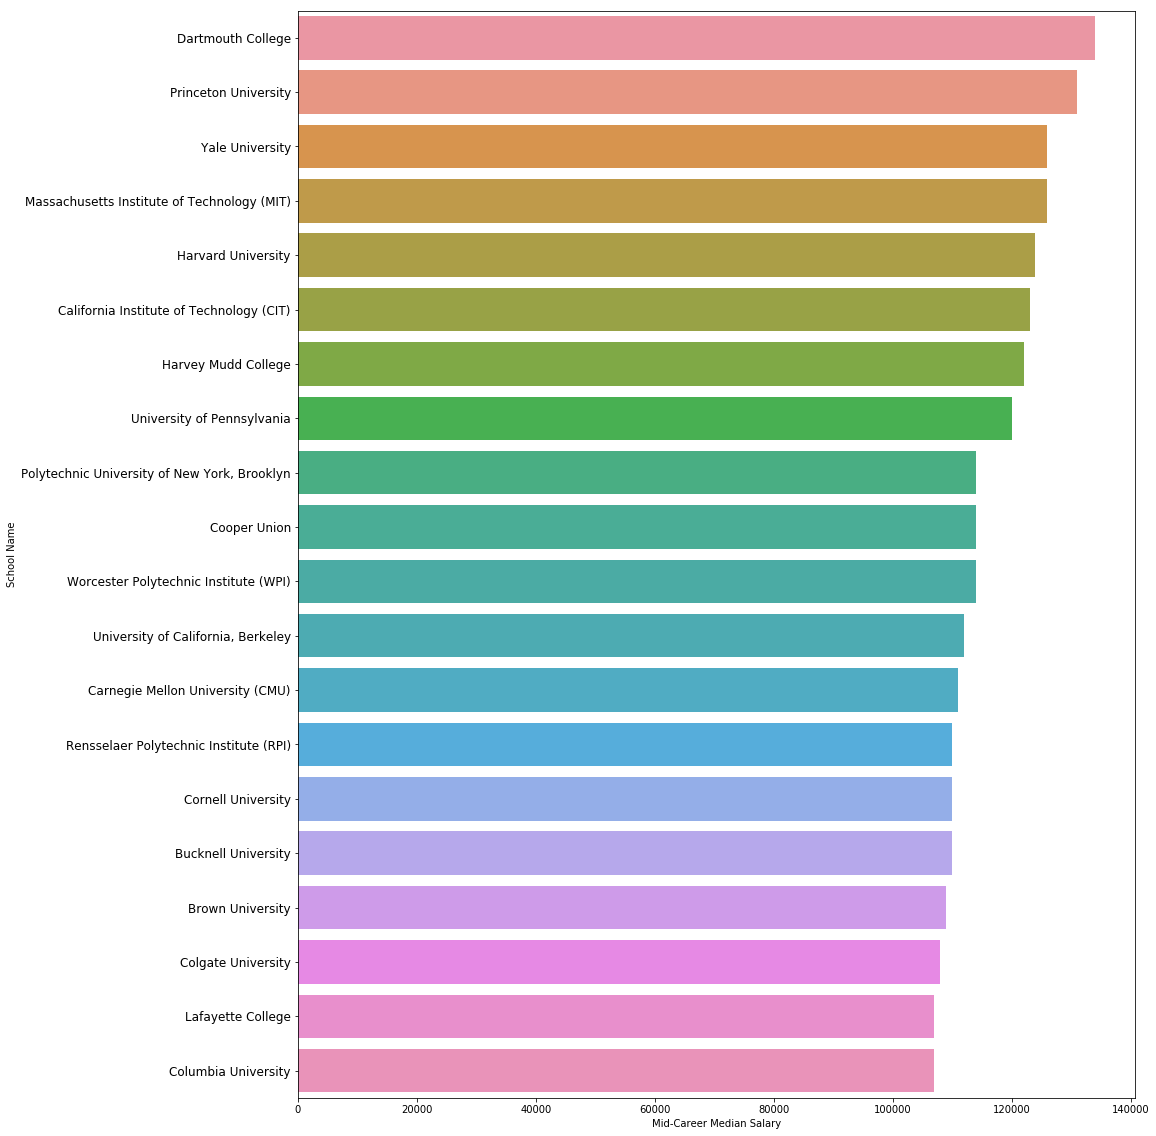

In [6]:
head = get_top_k_school(College_df, basedOn = "salary_mid")

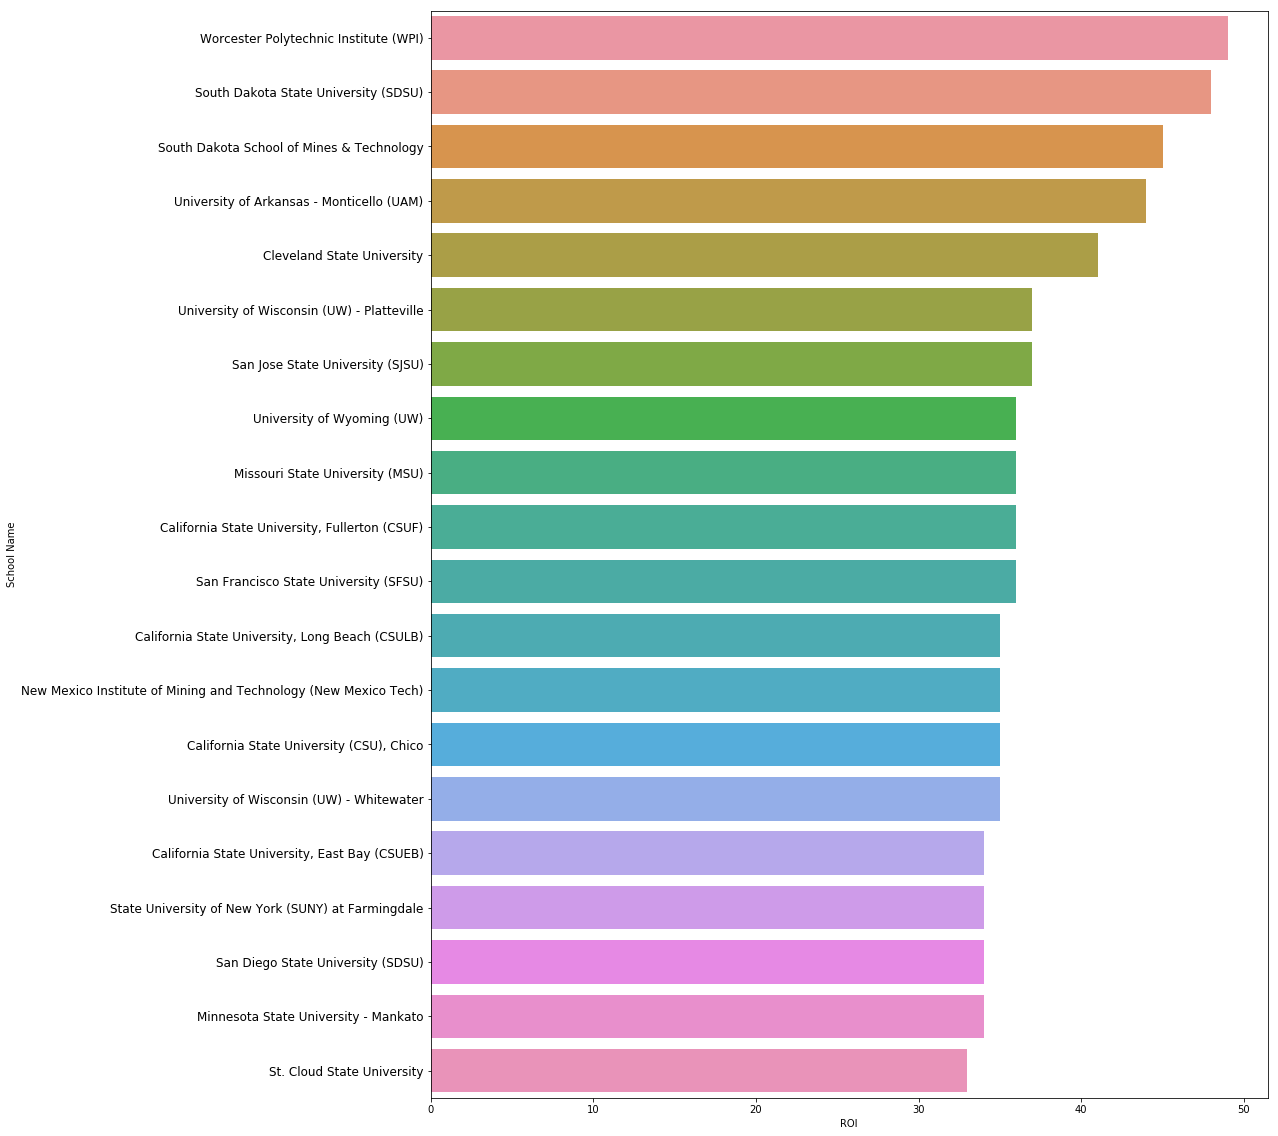

In [7]:
head = get_top_k_school(College_df, basedOn = "ROI")

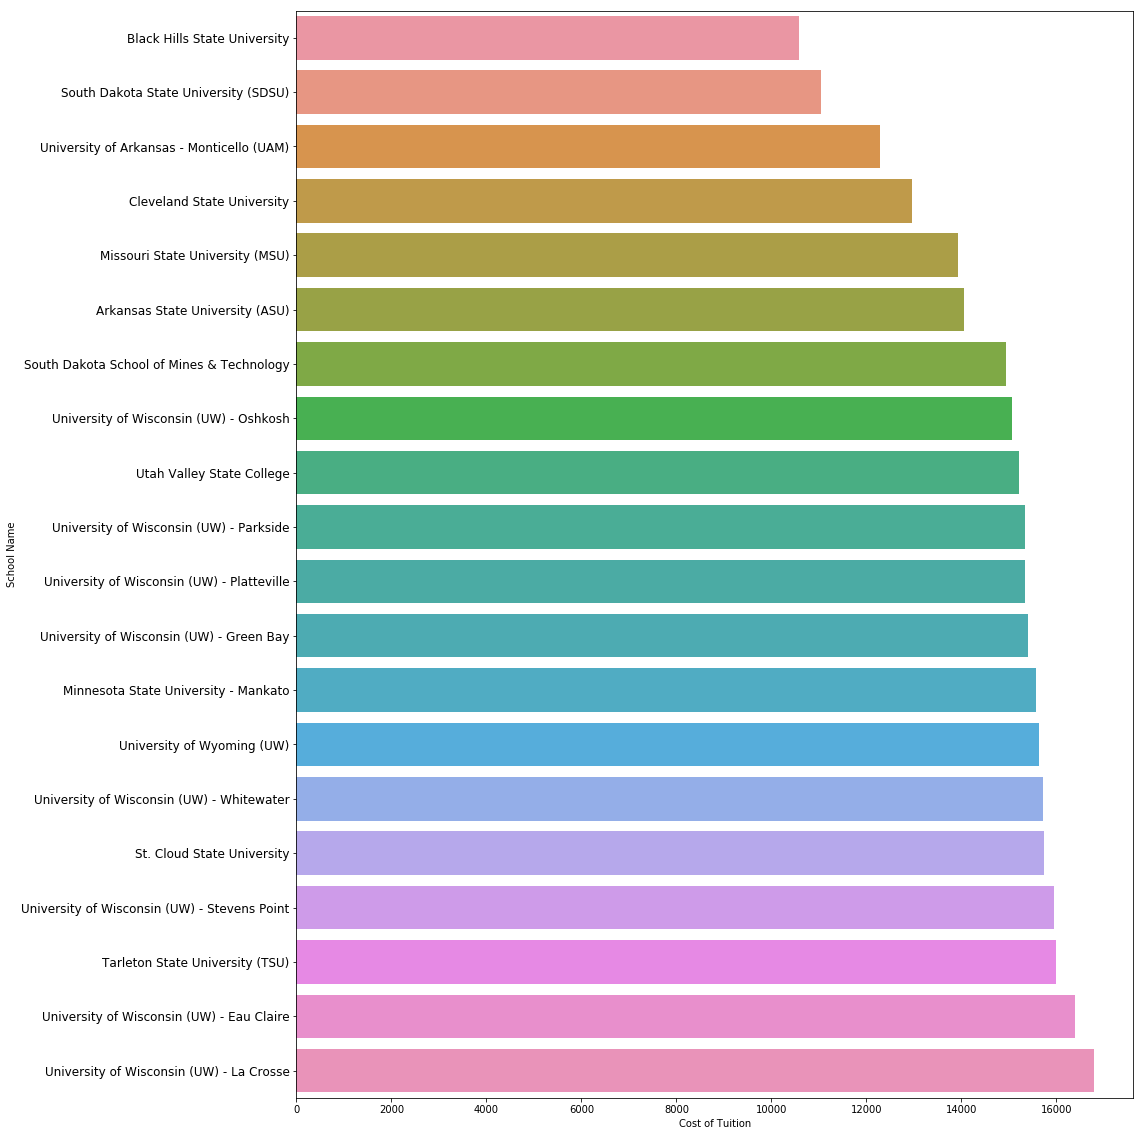

In [8]:
head = get_top_k_school(College_df, basedOn = "tuition", reverse = True)